## Statistical & Machine Learning
### Individual Project 


Jeanne Harling

In [1]:
R.version.string

[1] "R version 4.0.5 (2021-03-31)"

### 1. Importing libraries

In [2]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(plotrix)     # Draw circle
library(rgl)         # 3D plots
library(tidyverse)
library(tracerer)
library(ggplot2)
library(corrplot)
library(DataExplorer)
library(randomForest)
library(tree)
library(e1071)  
library(MASS)
library(ROCR)
library(Hmisc)
library(correlation)

Warning message:
"package 'data.table' was built under R version 4.1.2"
Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train



Attaching package: 'rgl'


The following object is masked from 'package:plotrix':

    mtext3d


Warning message:
"package 'tidyverse' was built under R version 4.1.2"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R

### 2. Importing the data set

In [3]:
credit_default <- read.csv("C:/Users/jharling/OneDrive - IESEG/Desktop/MSc/Statistical And Machine Learning/Individual Project/credit_default_train.csv")
credit_default

cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
18895,70000,1,3,2,34,0,0,0,0,⋯,25559,26134,26715,1700,1500,2000,1000,1000,2000,0
25102,390000,2,2,2,26,2,2,2,0,⋯,140387,128112,115514,5000,3000,5000,4548,4100,3300,0
28867,60000,1,1,2,27,0,0,0,0,⋯,26038,28607,27997,1378,1406,3000,3000,0,923,1
1842,140000,2,2,1,55,0,0,0,0,⋯,72391,61298,62193,4200,2822,2336,2588,2250,2491,0
3371,50000,1,1,2,29,2,2,2,0,⋯,1047,0,0,3000,0,1000,0,0,0,1
29925,20000,1,2,2,37,0,0,0,0,⋯,19105,19609,19283,1700,1600,1200,1000,900,1000,0
29940,50000,1,3,2,44,0,0,0,2,⋯,49952,19584,19080,1762,4800,0,837,700,1000,0
11638,250000,1,2,2,30,0,0,0,-1,⋯,9693,799,4295,2000,2305,4720,0,4305,0,0
4761,320000,2,2,2,36,-2,-2,-2,-2,⋯,15813,0,0,5000,4905,15873,0,0,21657,1


### 3. Dealing with missing values

In [4]:
# Sum of missing values in credit_default data set
sum(is.na(credit_default))

[1] 4448

In [5]:
# Where are the missing values
missing_values <- sapply(credit_default, function(x) sum(is.na(x)))
missing_values

cust_id                  LIMIT_BAL 
                         0                        202 
                       SEX                  EDUCATION 
                       161                        199 
                  MARRIAGE                        AGE 
                       170                        214 
                     PAY_0                      PAY_2 
                       195                        219 
                     PAY_3                      PAY_4 
                       217                        199 
                     PAY_5                      PAY_6 
                       185                        203 
                 BILL_AMT1                  BILL_AMT2 
                       185                        209 
                 BILL_AMT3                  BILL_AMT4 
                       175                        165 
                 BILL_AMT5                  BILL_AMT6 
                       181                        197 
                  PAY_AMT1                   PAY_AMT2 
                       204                        184 
                  PAY_AMT3                   PAY_AMT4 
                       212                        197 
                  PAY_AMT5                   PAY_AMT6 
                       179                        196 
default.payment.next.month 
                         0

First, let's separate encoding variables from non encoding ones.


• For encoded values we will replace the missing values with the mode. (The most replicated value)
These variables are sex, education and marriage. 

• Not encoded variables will be replaced by the mean or the median, depending if the variables are categorical or not.  
1. Categorical : LIMIT_BALL, PAY variables
2. None categorical variables are BILL_AMT, PAY_AMT and AGE

##### Encoded variables

In [6]:
# First, creating a calc to get the mode (see sources)

calc_mode <- function(x){
  
  # List the distinct / unique values
  distinct_values <- unique(x)
  
  # Count the occurrence of each distinct value
  distinct_tabulate <- tabulate(match(x, distinct_values))
  
  # Return the value with the highest occurrence
  distinct_values[which.max(distinct_tabulate)]
}

In [7]:
# Encoded variables: sex, education and marriage

# Sex
credit_default = credit_default %>% 
  mutate(SEX = if_else(is.na(SEX), 
                         calc_mode(SEX), 
                         SEX))

# Education
credit_default = credit_default %>% 
  mutate(EDUCATION = if_else(is.na(EDUCATION), 
                         calc_mode(EDUCATION), 
                         EDUCATION))

# Marriage
credit_default = credit_default %>% 
  mutate(MARRIAGE = if_else(is.na(MARRIAGE), 
                         calc_mode(MARRIAGE), 
                         MARRIAGE))

##### Categorical variables

In [8]:
# Now replacing categorical data with the median for PAY variables

credit_default$PAY_0[is.na(credit_default$PAY_0)]<-median(credit_default$PAY_0,na.rm=TRUE)
credit_default$PAY_2[is.na(credit_default$PAY_2)]<-median(credit_default$PAY_2,na.rm=TRUE)
credit_default$PAY_3[is.na(credit_default$PAY_3)]<-median(credit_default$PAY_3,na.rm=TRUE)
credit_default$PAY_4[is.na(credit_default$PAY_4)]<-median(credit_default$PAY_4,na.rm=TRUE)
credit_default$PAY_5[is.na(credit_default$PAY_5)]<-median(credit_default$PAY_5,na.rm=TRUE)
credit_default$PAY_6[is.na(credit_default$PAY_6)]<-median(credit_default$PAY_6,na.rm=TRUE)

# Replacing LIMIT_BAL with median 

credit_default$LIMIT_BAL[is.na(credit_default$LIMIT_BAL)]<-median(credit_default$LIMIT_BAL,na.rm=TRUE)

##### Ratio variables

In [9]:
# Replacing Age, Bill AMT and Pay AMT by the mean 

# Age: mean rounded
credit_default$AGE[is.na(credit_default$AGE)]<-mean(credit_default$AGE,na.rm=TRUE)
credit_default$AGE <- round(credit_default$AGE)

# Bill_AMT
credit_default$BILL_AMT1[is.na(credit_default$BILL_AMT1)]<-mean(credit_default$BILL_AMT1,na.rm=TRUE)
credit_default$BILL_AMT2[is.na(credit_default$BILL_AMT2)]<-mean(credit_default$BILL_AMT2,na.rm=TRUE)
credit_default$BILL_AMT3[is.na(credit_default$BILL_AMT3)]<-mean(credit_default$BILL_AMT3,na.rm=TRUE)
credit_default$BILL_AMT4[is.na(credit_default$BILL_AMT4)]<-mean(credit_default$BILL_AMT4,na.rm=TRUE)
credit_default$BILL_AMT5[is.na(credit_default$BILL_AMT5)]<-mean(credit_default$BILL_AMT5,na.rm=TRUE)
credit_default$BILL_AMT6[is.na(credit_default$BILL_AMT6)]<-mean(credit_default$BILL_AMT6,na.rm=TRUE)

# PAY AMT
credit_default$PAY_AMT1[is.na(credit_default$PAY_AMT1)]<-mean(credit_default$PAY_AMT1,na.rm=TRUE)
credit_default$PAY_AMT2[is.na(credit_default$PAY_AMT2)]<-mean(credit_default$PAY_AMT2,na.rm=TRUE)
credit_default$PAY_AMT3[is.na(credit_default$PAY_AMT3)]<-mean(credit_default$PAY_AMT3,na.rm=TRUE)
credit_default$PAY_AMT4[is.na(credit_default$PAY_AMT4)]<-mean(credit_default$PAY_AMT4,na.rm=TRUE)
credit_default$PAY_AMT5[is.na(credit_default$PAY_AMT5)]<-mean(credit_default$PAY_AMT5,na.rm=TRUE)
credit_default$PAY_AMT6[is.na(credit_default$PAY_AMT6)]<-mean(credit_default$PAY_AMT6,na.rm=TRUE)

In [10]:
# Checking if we have any missing values left
missing_values <- sapply(credit_default, function(x) sum(is.na(x)))
missing_values

cust_id                  LIMIT_BAL 
                         0                          0 
                       SEX                  EDUCATION 
                         0                          0 
                  MARRIAGE                        AGE 
                         0                          0 
                     PAY_0                      PAY_2 
                         0                          0 
                     PAY_3                      PAY_4 
                         0                          0 
                     PAY_5                      PAY_6 
                         0                          0 
                 BILL_AMT1                  BILL_AMT2 
                         0                          0 
                 BILL_AMT3                  BILL_AMT4 
                         0                          0 
                 BILL_AMT5                  BILL_AMT6 
                         0                          0 
                  PAY_AMT1                   PAY_AMT2 
                         0                          0 
                  PAY_AMT3                   PAY_AMT4 
                         0                          0 
                  PAY_AMT5                   PAY_AMT6 
                         0                          0 
default.payment.next.month 
                         0

In [11]:
sum(is.na(credit_default))

[1] 0

### 4. Checking for unique values

In [12]:
# checking all unique values inside each encoded variables

unique(credit_default$SEX)
unique(credit_default$MARRIAGE)
unique(credit_default$EDUCATION)

[1] 1 2

[1] 2 1 3 0

[1] 3 2 1 5 4 6 0

In [13]:
# MARRIAGE: I will replace 0 values per 'others' (value number 3)

credit_default["MARRIAGE"][credit_default["MARRIAGE"] == 0] <- 3

In [14]:
# EDUCATION: Replacing 0, 5 and 6 with 'others' (value 4)

credit_default["EDUCATION"][credit_default["EDUCATION"] == 0] <- 4
credit_default["EDUCATION"][credit_default["EDUCATION"] == 5] <- 4
credit_default["EDUCATION"][credit_default["EDUCATION"] == 6] <- 4

## Exploratory Analysis

##### Summary

In [15]:
# Summary of all our variables
# Be carefull of encoded variables such as cust_id, sex, education and marriage, the mean, median and quarters doesn't mean anything.

summary(credit_default)

    cust_id        LIMIT_BAL            SEX          EDUCATION    
 Min.   :    2   Min.   :  10000   Min.   :1.000   Min.   :1.000  
 1st Qu.: 7471   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15003   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15008   Mean   : 166432   Mean   :1.607   Mean   :1.842  
 3rd Qu.:22533   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :4.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :1.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.565   Mean   :35.47   Mean   :-0.0199   Mean   :-0.1293  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :75.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

##### General Plots

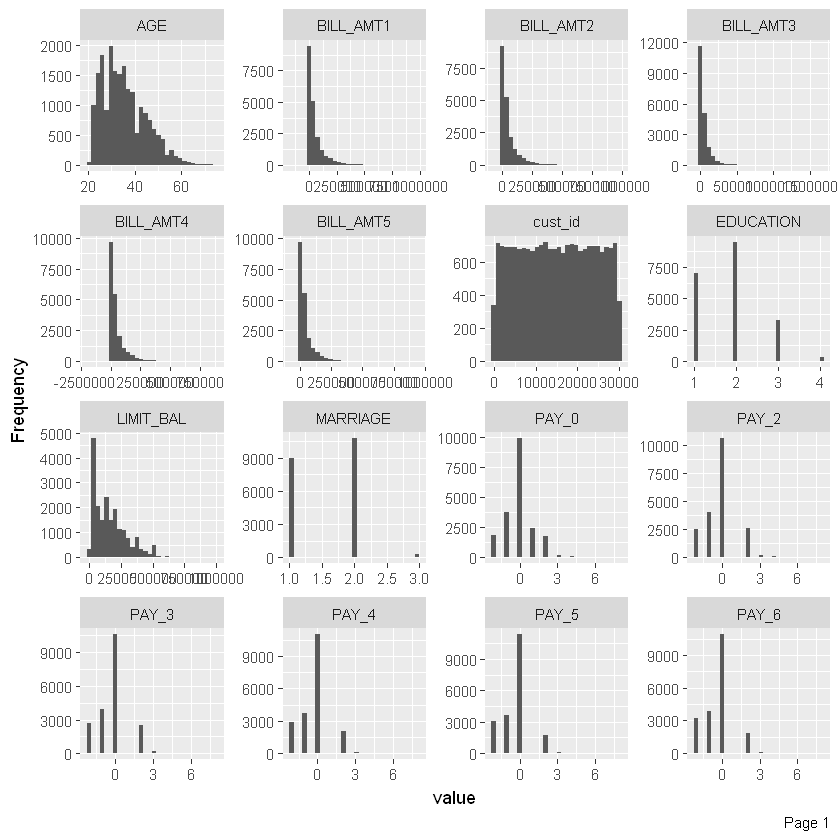

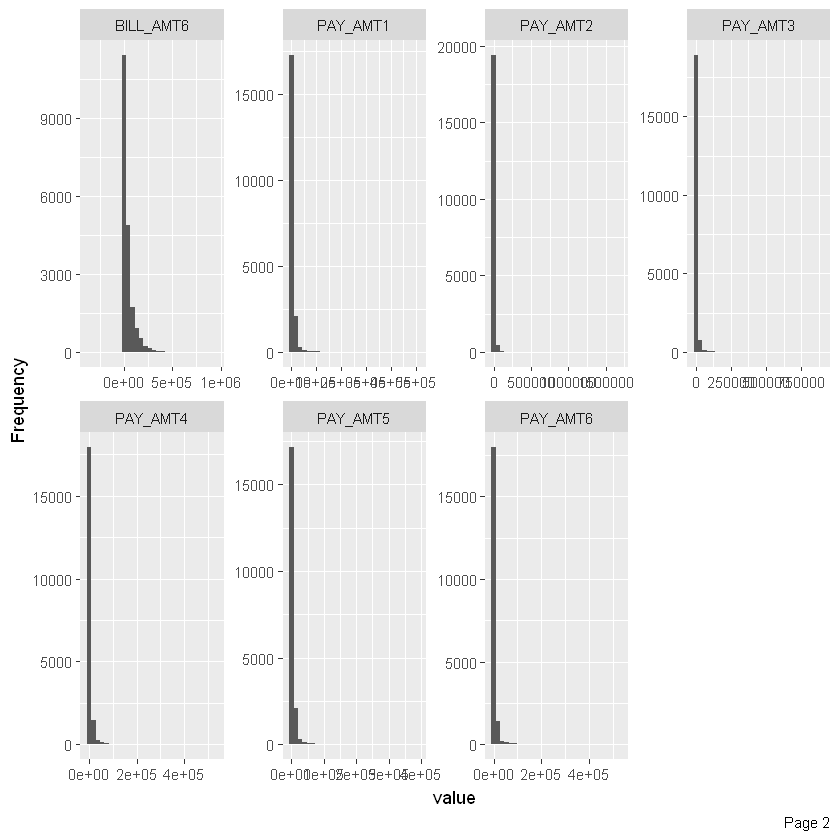

In [16]:
# Overall view of how our data looks like

plot_histogram(credit_default)

From the graphs above we can notice that most of our variables are positively skewed. (The mean will be greater than the median and the mode). An exception occure from PAY_0 to PAY_6 that are negatively skewed. 


• Mean age is 35 years old

• We have 61% of women and 39% of men

• 53% of our clientele is single and 45% is married (2% for others)

• Mean of the amount of given credit is equal to 166 432$

• Mean of all BILL AMT is equal to 44 826$ and decrease month after month

• Mean of all PAY AMT is equal to 5229$

• 22% percent of our clients pay the default payment next month (Our target variable)

In [17]:
# EDUCATION count
# Most of our clients went in graduating school and university. 

count(credit_default, vars = EDUCATION)

vars,n
<dbl>,<int>
1,6987
2,9484
3,3225
4,304


In [18]:
# GENDER count
# 1 is for male and 2 for female
# We have more female than male clients

count(credit_default, vars = SEX)

vars,n
<int>,<int>
1,7855
2,12145


In [19]:
# MARITAL STATUS count
# 1 is married, 2 is single and 3 is 'others'. 

count(credit_default, vars = MARRIAGE)

vars,n
<dbl>,<int>
1,8958
2,10793
3,249


In [20]:
# Default Payment 
# Only 22% of clients pay the default payment for the next month

count(credit_default, vars = default.payment.next.month)

vars,n
<int>,<int>
0,15586
1,4414


##### Correlation matrix

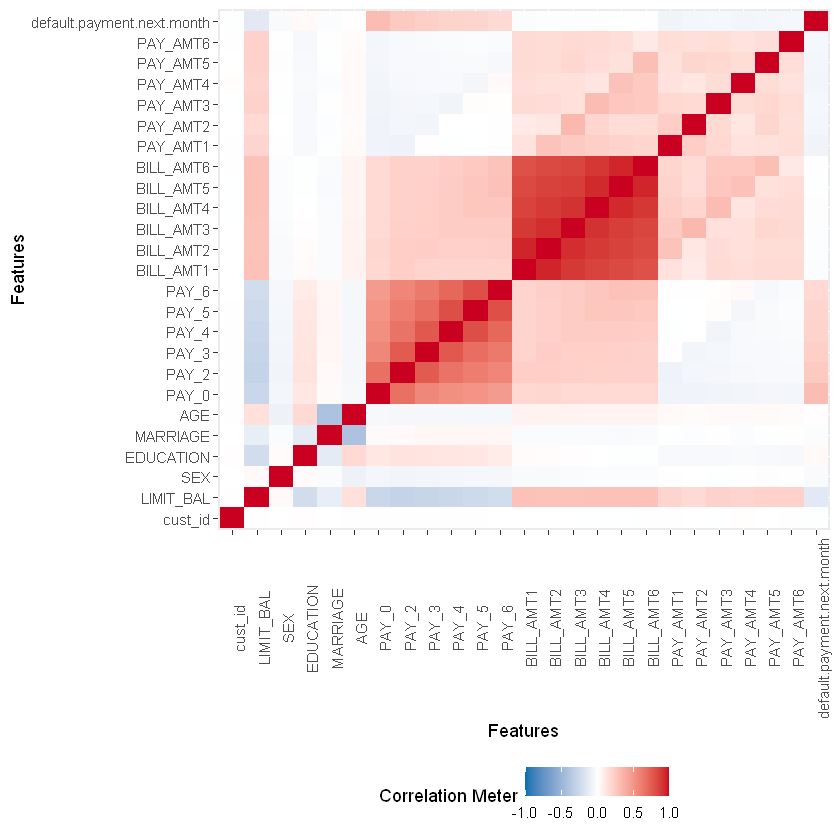

In [21]:
# Plotting correlation

plot_correlation(na.omit(credit_default), maxcat = 5L)

The correlation matrix will help us to chose which variables we should consider for the algorithms.  

The most correlated variables to ou target one (default_payment) are the payment ones (from PAY_0 to PAY_6). There is also a negative correlation between LIMIT_BAL and default_payment. PAY AMT only has a slight negative correlation but it is not obvious yet. 

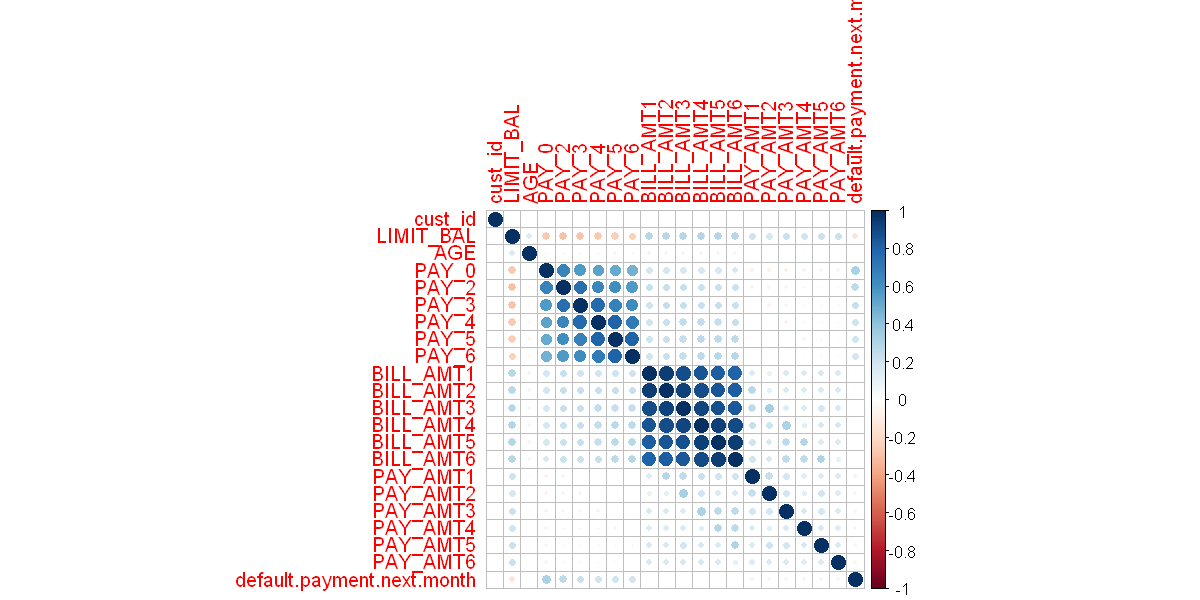

In [54]:
# Other possibility 

credit_default$default.payment.next.month = as.numeric(credit_default$default.payment.next.month)
r = cor(credit_default[-c(3, 4, 5, 26, 27)])
corrplot(r, method = "circle")

##### Statistics and P value

In [190]:
# Creating the flattenCorrMatrix
# cormat : matrix of the correlation coefficients
# pmat : matrix of the correlation p-values

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

# Sources: http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

In [230]:
# Plotting without customer_id
credit = credit_default[,-1]

In [231]:
# Results
results<-rcorr(as.matrix(credit))
results <-flattenCorrMatrix(results$r, results$P)
results = results %>% filter( 
            column == "default.payment.next.month")
results 

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
LIMIT_BAL,default.payment.next.month,-0.144974874,0.000000e+00
SEX,default.payment.next.month,-0.035402044,5.503803e-07
EDUCATION,default.payment.next.month,0.028064628,7.203221e-05
MARRIAGE,default.payment.next.month,-0.020836263,3.210514e-03
AGE,default.payment.next.month,0.007350303,2.986007e-01
PAY_0,default.payment.next.month,0.312584177,0.000000e+00
PAY_2,default.payment.next.month,0.251610378,0.000000e+00
PAY_3,default.payment.next.month,0.227611921,0.000000e+00
PAY_4,default.payment.next.month,0.209690291,0.000000e+00


In [232]:
# correlation

corr_results <- correlation::correlation(credit,
                                          include_factors = TRUE, 
                                          method = "auto")

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!

For i = 2 j = 1  A cell entry of 0 was replaced with correct =  0.5.  Check your data!



In [233]:
# T stats and p value for credit table and default.payment.next.month, according to Holm adjustment method

corr_result = corr_results %>% filter( 
            Parameter2 == "default.payment.next.month")
print(corr_result)

# Correlation Matrix (auto-method)

Parameter1  |                 Parameter2 |         r |         95% CI | t(19998) |         p
--------------------------------------------------------------------------------------------
LIMIT_BAL   | default.payment.next.month |     -0.14 | [-0.16, -0.13] |   -20.72 | < .001***
SEX.1       | default.payment.next.month |      0.06 | [ 0.05,  0.08] |     8.85 | < .001***
SEX.2       | default.payment.next.month |     -0.06 | [-0.08, -0.05] |    -8.85 | < .001***
EDUCATION.1 | default.payment.next.month |     -0.08 | [-0.10, -0.07] |   -11.58 | < .001***
EDUCATION.2 | default.payment.next.month |      0.06 | [ 0.04,  0.07] |     8.08 | < .001***
EDUCATION.3 | default.payment.next.month |      0.06 | [ 0.05,  0.07] |     8.52 | < .001***
EDUCATION.4 | default.payment.next.month |     -0.27 | [-0.29, -0.26] |   -40.06 | < .001***
MARRIAGE.1  | default.payment.next.month |      0.04 | [ 0.03,  0.05] |     5.66 | < .001***
MARRIAGE.2  | default.payment.next

##### Plotting Main differences 

In [24]:
# First, selection most relevant variables from PAY_0 to PAY_6 and LIMIT BAL.

new_credit <- credit_default[c(2,7,8,9,10,11,12,25)]

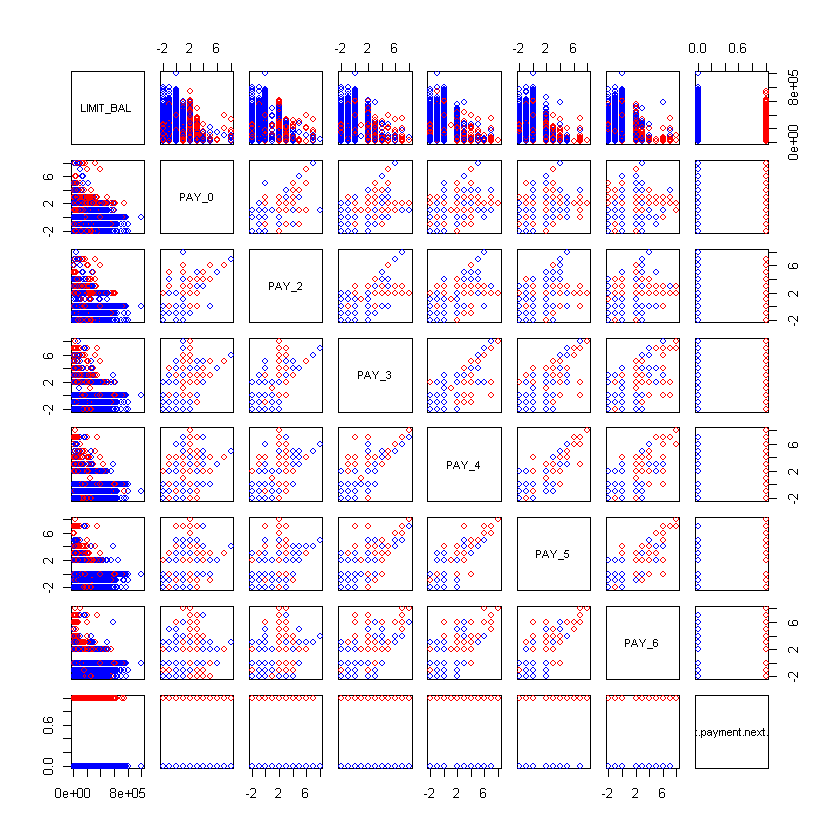

In [25]:
# Then, plotting a quick analysis to check which predictor has the highest predictability

cols <- rep('blue', nrow(new_credit))  # Not default
cols[new_credit$default.payment.next.month == 1] <- 'red'  # Default
pairs(new_credit, col=cols)

In each monthly payment (from PAY_0 to PAY_6) we can find that the default values are generally higher than the others. 
The high rates in this PAY variable mean delay.
This indicates that generally their late payment will accentuate other tardiveness. 

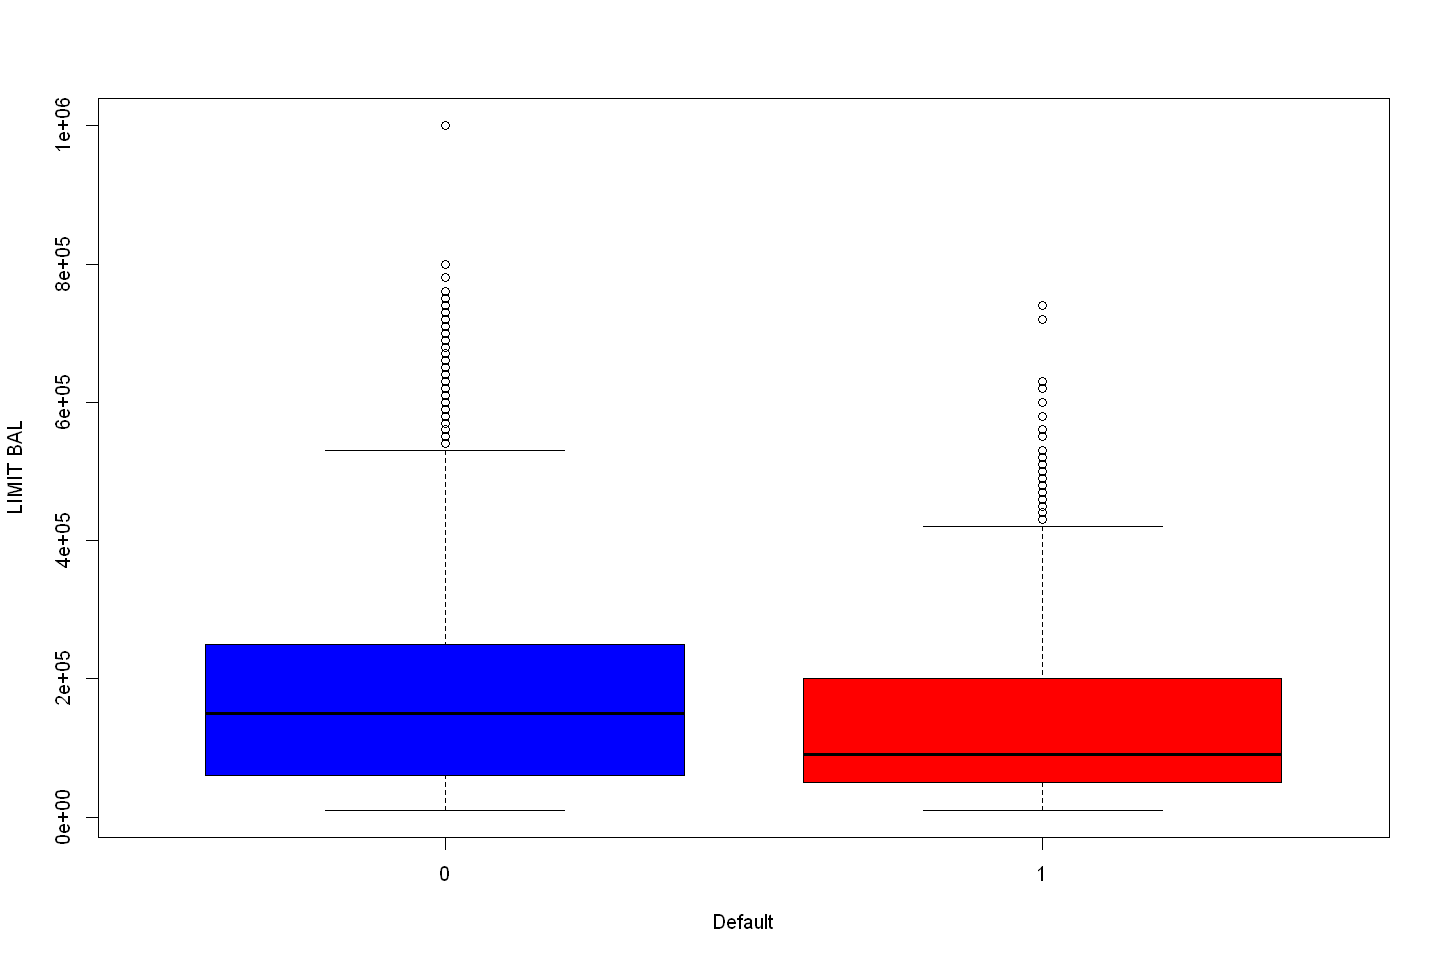

In [176]:
# What interpretability for LIMIT BAL ?

# Relationship between LIMIT BAL and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(credit))  # Not default
cols[credit$default.payment.next.month == 1] <- 'red'  # Default

boxplot(LIMIT_BAL ~ default.payment.next.month, data=credit,
        col=c('blue', 'red'),
        xlab='Default', ylab='LIMIT BAL')

The relationship between the limit balance and the default payment is quite significant.
The average non-payer generally has a lower limit balance than the average payer.


# Machine Learning Models

#### 1. Creating Factors

In [27]:
# Creating factors for our categorical data 

credit_default$SEX = as.factor(credit_default$SEX)
credit_default$MARRIAGE = as.factor(credit_default$MARRIAGE)
credit_default$EDUCATION = as.factor(credit_default$EDUCATION)
credit_default$default.payment.next.month = as.factor(credit_default$default.payment.next.month)

In [235]:
# Uploading the basetable as a csv

write.csv(credit_default, "C:/Users/jharling/OneDrive - IESEG/Desktop/MSc/Statistical And Machine Learning/Individual Project/BaseTable.csv", row.names = FALSE)

#### 2. Train and Test

In order to run our model we will split our data into train and test set. For this, we will remove all the none necessary variables such as client_id.

In [28]:
credit = credit_default[,-1]
str(credit)

'data.frame':	20000 obs. of  24 variables:
 $ LIMIT_BAL                 : num  70000 390000 60000 140000 50000 20000 50000 250000 320000 300000 ...
 $ SEX                       : Factor w/ 2 levels "1","2": 1 2 1 2 1 1 1 1 2 1 ...
 $ EDUCATION                 : Factor w/ 4 levels "1","2","3","4": 3 2 1 2 1 2 3 2 2 1 ...
 $ MARRIAGE                  : Factor w/ 3 levels "1","2","3": 2 2 2 1 2 2 2 2 2 1 ...
 $ AGE                       : num  34 26 27 55 29 37 44 30 36 35 ...
 $ PAY_0                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_2                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_3                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_4                     : int  0 0 0 0 0 0 2 -1 -2 0 ...
 $ PAY_5                     : int  0 0 0 0 0 0 0 2 -2 0 ...
 $ PAY_6                     : int  0 0 2 0 -2 0 0 -1 -2 0 ...
 $ BILL_AMT1                 : num  53972 185111 21387 108038 7881 ...
 $ BILL_AMT2                 : num  23149 172865 22416 110216 10415 ...
 $ BILL_A

In [29]:
# Creating train and test data

mysample = sort(sample(nrow(credit),nrow(credit)*.8))

train <- credit[mysample,]
test <- credit[-mysample,]

In [30]:
# Checking proportion of yes and no in each table

# Our data set
prop.table(table(credit$default.payment.next.month))

# Training set
prop.table(table(train$default.payment.next.month))

# Test set
prop.table(table(test$default.payment.next.month))



     0      1 
0.7793 0.2207 


       0        1 
0.779375 0.220625 


    0     1 
0.779 0.221 

### 1. Random Forest

In [31]:
# Fitting the random forest to our training set

randomforestmodel = randomForest(formula = default.payment.next.month ~., 
                           data = train, ntree = 10)

summary(randomforestmodel)

                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       16000  factor numeric  
err.rate           30  -none- numeric  
confusion           6  -none- numeric  
votes           32000  matrix numeric  
oob.times       16000  -none- numeric  
classes             2  -none- character
importance         23  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               16000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [169]:
# Feature importance

importance(randomforestmodel)

,MeanDecreaseGini
LIMIT_BAL,290.55636
SEX,52.03213
EDUCATION,117.57607
MARRIAGE,68.85500
AGE,323.16663
PAY_0,425.53856
PAY_2,279.34155
PAY_3,136.88085
PAY_4,101.59406
PAY_5,153.83334


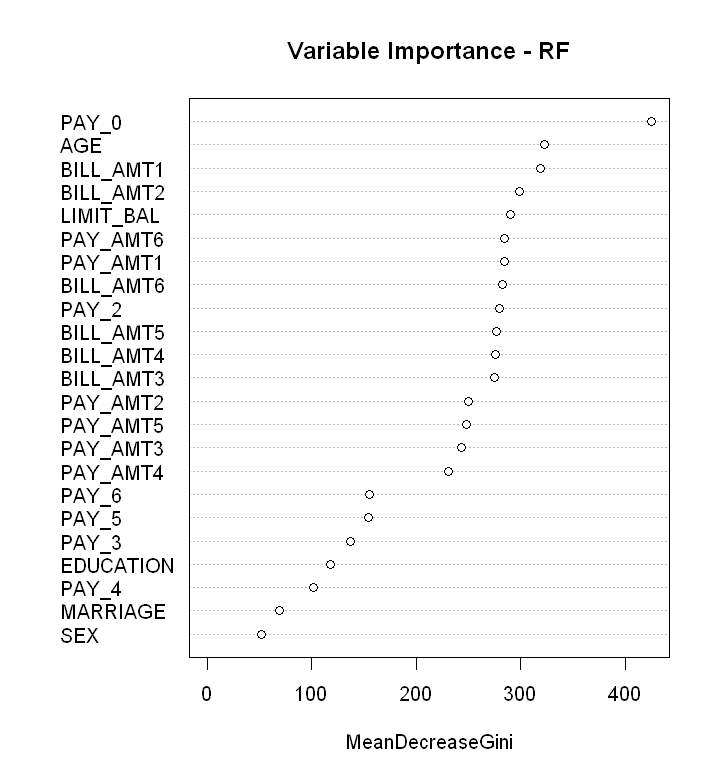

In [170]:
# Plotting feature importance

options(repr.plot.width=6, repr.plot.height=6.5)
varImpPlot(randomforestmodel, type=2, main='Variable Importance - RF')

In [32]:
# Predictions

RF_prediction = predict(randomforestmodel, newdata = test, type = "class")

In [33]:
# Evaluation 

confusionMatrix(RF_prediction, test$default.payment.next.month)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2907  592
         1  209  292
                                         
               Accuracy : 0.7998         
                 95% CI : (0.787, 0.8121)
    No Information Rate : 0.779          
    P-Value [Acc > NIR] : 0.0007443      
                                         
                  Kappa : 0.3116         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9329         
            Specificity : 0.3303         
         Pos Pred Value : 0.8308         
         Neg Pred Value : 0.5828         
             Prevalence : 0.7790         
         Detection Rate : 0.7268         
   Detection Prevalence : 0.8748         
      Balanced Accuracy : 0.6316         
                                         
       'Positive' Class : 0              
                                         

In [69]:
# AUC 

#To get AUC i need probability so i change type to "prob"

RF_predictions = predict(randomforestmodel, newdata = test, type = "prob")

# keeping only probability of the second column, corresponding to the '1'

RF_predictions = RF_predictions[,2]

In [75]:
print(paste0('AUC = ', pROC::auc(pROC::roc(test$default.payment.next.month, RF_predictions))))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.730282761865485"


In [35]:
# Using K-fold cross validation

folds = createFolds(y = train$default.payment.next.month, k = 10)

RF_crossvalidation = lapply(folds, function(var){
  train_fold = train[-var, ]
  test_fold = train[var, ]
  
  RF_classify = randomForest(formula = default.payment.next.month ~., 
                               data = train_fold, ntree = 20)
  RF_prediction_folds = predict(RF_classify, newdata = test_fold, type = "class")
  
  randomforest_folds = confusionMatrix(RF_prediction_folds, test_fold$default.payment.next.month)
  accuracy = randomforest_folds$overall[1]
  
  return(accuracy)
})

In [36]:
# Checking the accuracy after k-fold cross validation

mean(as.numeric(RF_crossvalidation))

[1] 0.812875

### 2. Logistic Regression

In [38]:
# Fitting the Logic Regression to our training set

LogisticRegressionModel <- glm(default.payment.next.month ~., data = train, family = binomial(link = "logit"))
summary(LogisticRegressionModel)


Call:
glm(formula = default.payment.next.month ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0315  -0.7045  -0.5507  -0.2854   3.1846  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.862e-01  1.181e-01  -8.351  < 2e-16 ***
LIMIT_BAL   -5.045e-07  2.142e-07  -2.355 0.018546 *  
SEX2        -9.502e-02  4.204e-02  -2.260 0.023814 *  
EDUCATION2  -1.367e-01  4.841e-02  -2.825 0.004734 ** 
EDUCATION3  -1.484e-01  6.529e-02  -2.273 0.023029 *  
EDUCATION4  -1.462e+00  2.885e-01  -5.069    4e-07 ***
MARRIAGE2   -1.687e-01  4.716e-02  -3.576 0.000349 ***
MARRIAGE3   -2.466e-01  1.807e-01  -1.365 0.172228    
AGE          5.581e-03  2.533e-03   2.203 0.027582 *  
PAY_0        5.927e-01  2.429e-02  24.399  < 2e-16 ***
PAY_2        5.371e-02  2.751e-02   1.953 0.050864 .  
PAY_3        7.303e-02  3.071e-02   2.378 0.017411 *  
PAY_4        1.435e-02  3.360e-02   0.427 0.66923

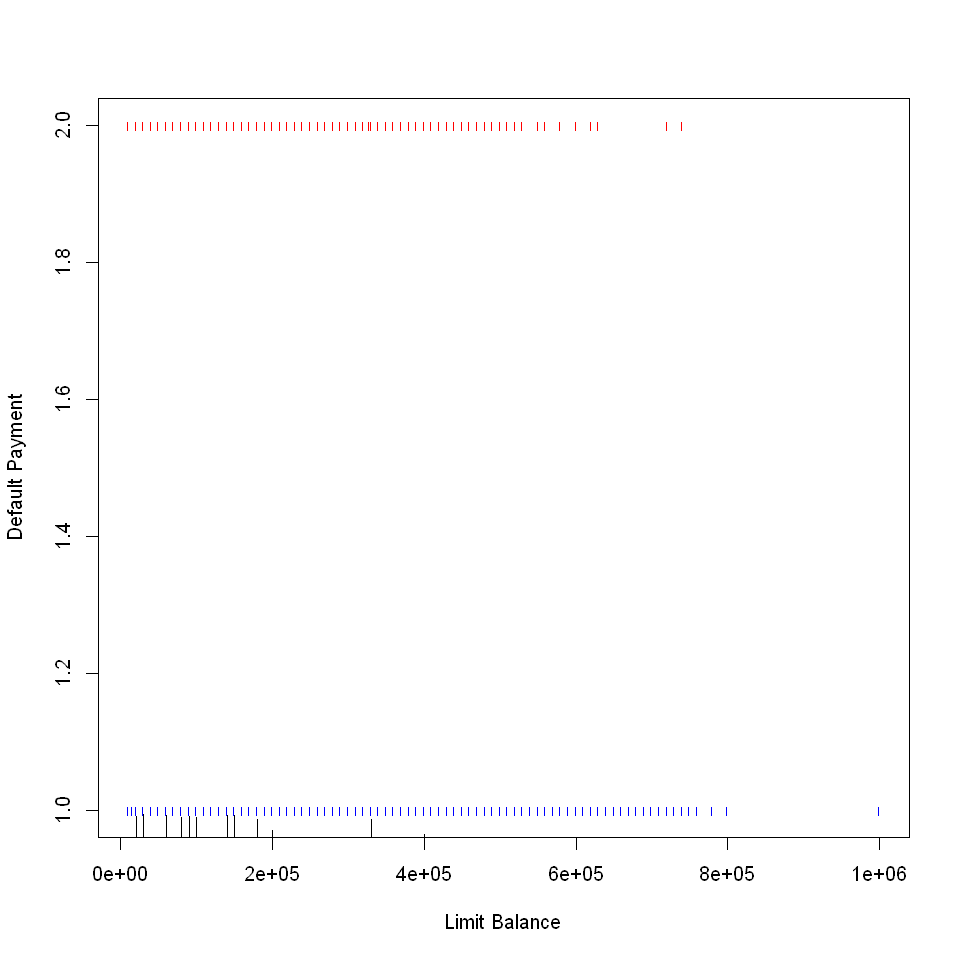

In [179]:
# Relationship between Limit Balance and default payment

options(repr.plot.width=8, repr.plot.height=8)
cols <- rep('blue', nrow(credit))  # Not default
cols[credit$default.payment.next.month == 1] <- 'red'  # Default

plot(x=credit$LIMIT_BAL, y=credit$default.payment.next.month,  # Plot the data
     xlab='Limit Balance', ylab='Default Payment',
     pch='|', cex=0.5, col=cols)

# Prepare data for the Logistic Regression plot
df_sort <- credit[order(credit$LIMIT_BAL), ]  # Sort the data
xweight <- df_sort$LIMIT_BAL
yweight <- predict(LogisticRegressionModel, df_sort, type="response")

lines(xweight, yweight)  # Plot the LR

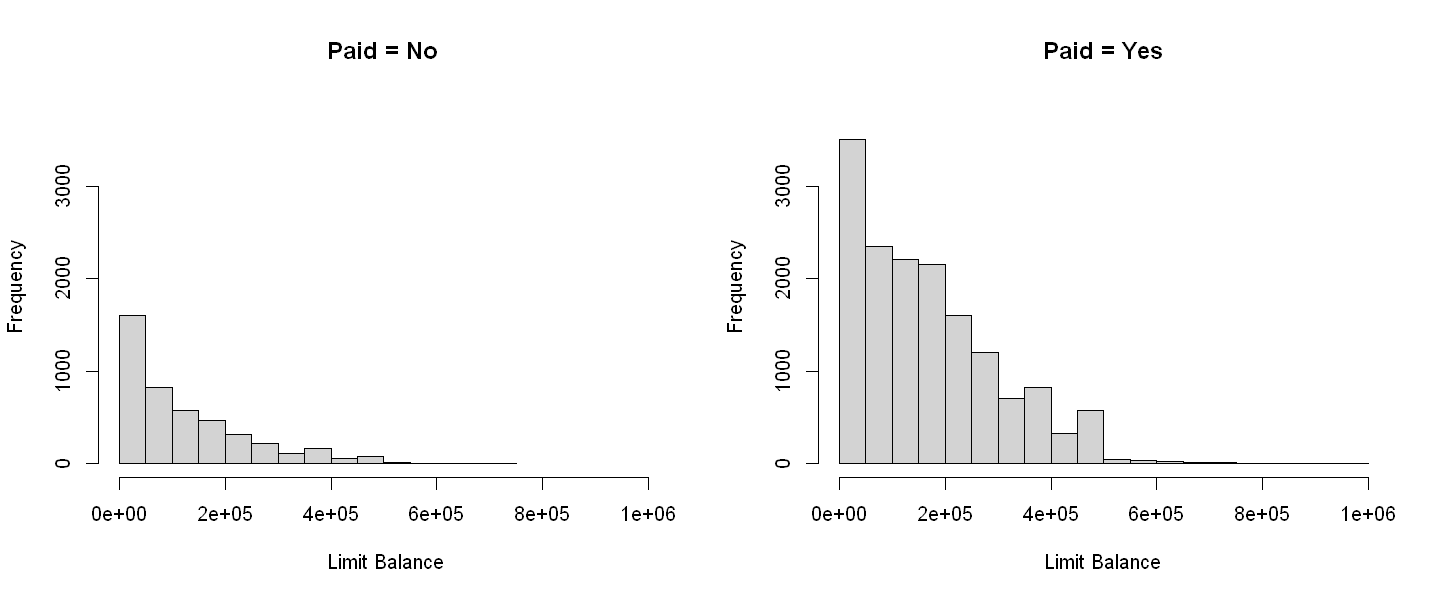

In [186]:
# Explain the limit balance of non payer

options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1, 2))
hist(credit[credit$default.payment.next.month == 1, 'LIMIT_BAL'], breaks=20,
     xlim=c(0, max(credit$LIMIT_BAL)), ylim=c(0, 3800),
     main='Paid = No', xlab=' Limit Balance')
hist(credit[credit$default.payment.next.month == 0, 'LIMIT_BAL'], breaks=20,
     xlim=c(0, max(credit$LIMIT_BAL)), ylim=c(0, 3800),
     main='Paid = Yes', xlab='Limit Balance')

In [150]:
# stepwise 

step <- stepAIC(object = LogisticRegressionModel,trace=FALSE)
step$anova

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,15973,14920.95,14974.95
- PAY_AMT3,1,0.005708993,15974,14920.96,14972.96
- PAY_6,1,0.095333712,15975,14921.05,14971.05
- BILL_AMT5,1,0.167622526,15976,14921.22,14969.22
- PAY_4,1,0.196542325,15977,14921.42,14967.42
- BILL_AMT3,1,0.938128768,15978,14922.36,14966.36
- BILL_AMT4,1,1.453509337,15979,14923.81,14965.81


In [151]:
summary(step)


Call:
glm(formula = default.payment.next.month ~ LIMIT_BAL + SEX + 
    EDUCATION + MARRIAGE + AGE + PAY_0 + PAY_2 + PAY_3 + PAY_5 + 
    BILL_AMT1 + BILL_AMT2 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + 
    PAY_AMT4 + PAY_AMT5 + PAY_AMT6, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0340  -0.7041  -0.5507  -0.2860   3.3678  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.887e-01  1.181e-01  -8.374  < 2e-16 ***
LIMIT_BAL   -5.374e-07  2.127e-07  -2.527 0.011498 *  
SEX2        -9.441e-02  4.202e-02  -2.247 0.024658 *  
EDUCATION2  -1.368e-01  4.838e-02  -2.828 0.004681 ** 
EDUCATION3  -1.493e-01  6.524e-02  -2.288 0.022154 *  
EDUCATION4  -1.470e+00  2.885e-01  -5.094  3.5e-07 ***
MARRIAGE2   -1.695e-01  4.715e-02  -3.596 0.000324 ***
MARRIAGE3   -2.451e-01  1.806e-01  -1.357 0.174716    
AGE          5.616e-03  2.533e-03   2.217 0.026637 *  
PAY_0        5.944e-01  2.423e-02

In [153]:
# Predictions

LR_predictions <- predict(step, test, type="response")


# As our predictions in logistics regression are probablity percentage we need to assign a value equal to 0 or 1 
# If the prediction is greater than 0.5, then we can assign a value of 1. 

LR_prediction <- ifelse(LR_predictions > 0.5, 1, 0)

# Evaluation

confusionMatrix(factor(LR_prediction), test$default.payment.next.month)

# AUC

print(paste0('AUC = ', pROC::auc(pROC::roc(test$default.payment.next.month, LR_predictions))))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3019  674
         1   97  210
                                          
               Accuracy : 0.8072          
                 95% CI : (0.7947, 0.8194)
    No Information Rate : 0.779           
    P-Value [Acc > NIR] : 6.717e-06       
                                          
                  Kappa : 0.2694          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9689          
            Specificity : 0.2376          
         Pos Pred Value : 0.8175          
         Neg Pred Value : 0.6840          
             Prevalence : 0.7790          
         Detection Rate : 0.7548          
   Detection Prevalence : 0.9233          
      Balanced Accuracy : 0.6032          
                                          
       'Positive' Class : 0               
                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.71999140329579"


In [39]:
# Predictions without stepwise

LR_predictions <- predict(LogisticRegressionModel, test, type="response")


# As our predictions in logistics regression are probablity percentage we need to assign a value equal to 0 or 1 
# If the prediction is greater than 0.5, then we can assign a value of 1. 

LR_prediction <- ifelse(LR_predictions > 0.5, 1, 0)

In [40]:
# Evaluation

confusionMatrix(factor(LR_prediction), test$default.payment.next.month)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3020  676
         1   96  208
                                          
               Accuracy : 0.807           
                 95% CI : (0.7944, 0.8191)
    No Information Rate : 0.779           
    P-Value [Acc > NIR] : 8.034e-06       
                                          
                  Kappa : 0.2673          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9692          
            Specificity : 0.2353          
         Pos Pred Value : 0.8171          
         Neg Pred Value : 0.6842          
             Prevalence : 0.7790          
         Detection Rate : 0.7550          
   Detection Prevalence : 0.9240          
      Balanced Accuracy : 0.6022          
                                          
       'Positive' Class : 0               
                        

In [41]:
# AUC

print(paste0('AUC = ', pROC::auc(pROC::roc(test$default.payment.next.month, LR_predictions))))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.71975034706289"


In [133]:
# Using k-fold Cross validation

folds = createFolds(y = train$default.payment.next.month, k = 10)

LR_crossvalidation = lapply(folds, function(var){
  train_fold = train[-var, ]
  test_fold = train[var, ]
  
   LR_classify = glm(default.payment.next.month ~., data = train, family = binomial(link = "logit"))
    
  LR_prediction_folds = predict(LR_classify, newdata = test, type = "response")
  LR_prediction_folds = round(LR_prediction_folds)
  LR_prediction_folds = as.factor(LR_prediction_folds)
  
  LR_folds = confusionMatrix(LR_prediction_folds, test$default.payment.next.month)
  accuracy = LR_folds$overall[1]
  
  return(accuracy)
})

In [134]:
# Checking the accuracy after k-fold cross validation

mean(as.numeric(LR_crossvalidation))

[1] 0.807

### 3. LDA

In [42]:
# fitting LDA model with our data set

md_lda <- lda(default.payment.next.month ~ ., data=train)
md_lda

Call:
lda(default.payment.next.month ~ ., data = train)

Prior probabilities of groups:
       0        1 
0.779375 0.220625 

Group means:
  LIMIT_BAL      SEX2 EDUCATION2 EDUCATION3  EDUCATION4 MARRIAGE2  MARRIAGE3
0  175657.3 0.6169206  0.4661588  0.1563753 0.017802727 0.5492382 0.01251002
1  131855.5 0.5730878  0.4994334  0.1824363 0.003966006 0.5150142 0.01331445
      AGE      PAY_0      PAY_2      PAY_3      PAY_4      PAY_5       PAY_6
0 35.4320 -0.2091419 -0.2913392 -0.3104250 -0.3498797 -0.3841219 -0.40208500
1 35.6813  0.6345609  0.4101983  0.3161473  0.2053824  0.1314448  0.07790368
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
0  51555.11  48980.23  47147.85  43147.32  40078.56  38670.39 6000.381  6511.86
1  47398.75  46263.27  44092.40  40957.10  38707.26  37529.21 3451.106  3335.43
  PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
0 5681.403 5276.179 5306.328 5783.722
1 3485.983 3010.149 3049.896 3318.331

Coefficients of linear discriminants:
     

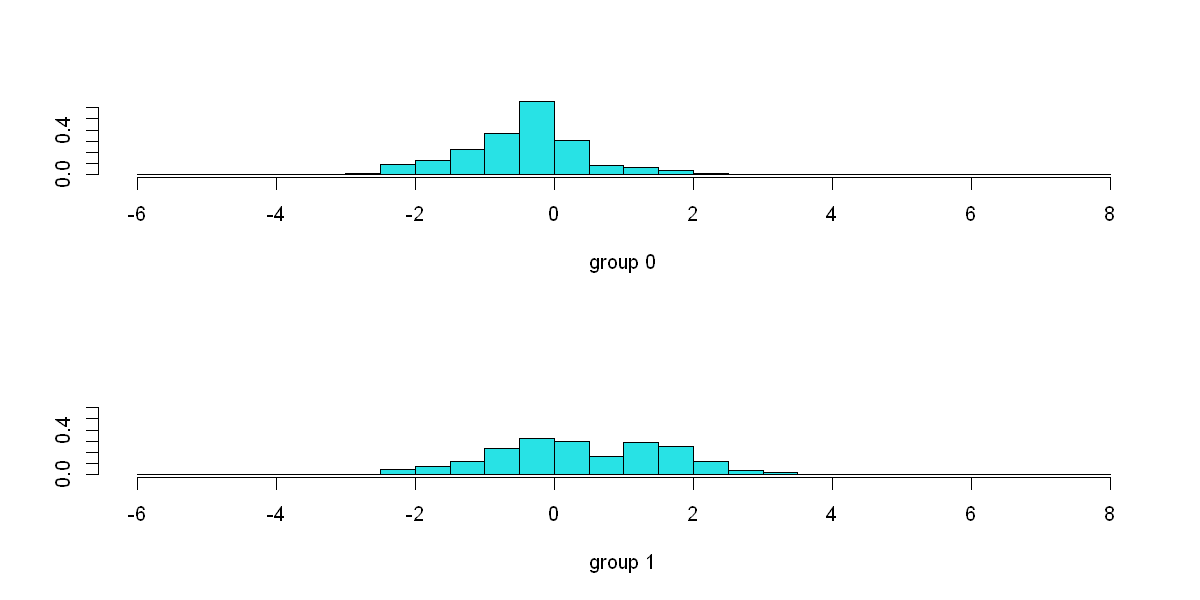

In [154]:
# Plotting LDA

plot(md_lda)

In [159]:
# Making the prediction

set.seed(1)

LDA_prediction <- predict(md_lda, newdata=test, type='class')

confusionMatrix(LDA_prediction$class, test$default.payment.next.month)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3010  662
         1  106  222
                                          
               Accuracy : 0.808           
                 95% CI : (0.7954, 0.8201)
    No Information Rate : 0.779           
    P-Value [Acc > NIR] : 3.891e-06       
                                          
                  Kappa : 0.2802          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9660          
            Specificity : 0.2511          
         Pos Pred Value : 0.8197          
         Neg Pred Value : 0.6768          
             Prevalence : 0.7790          
         Detection Rate : 0.7525          
   Detection Prevalence : 0.9180          
      Balanced Accuracy : 0.6086          
                                          
       'Positive' Class : 0               
                        

In [160]:
# Getting AUC from probability 

pred_proba <- LDA_prediction$posterior[,2]

# AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test$default.payment.next.month, pred_proba))))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.711134038882661"


In [161]:
# Using K-fold cross validation

folds = createFolds(y = train$default.payment.next.month, k = 10)

LDA_crossvalidation = lapply(folds, function(var){
  train_fold = train[-var, ]
  test_fold = train[var, ]
  
  LDA_classify = lda(default.payment.next.month ~ ., data=train)
    
  LDA_prediction_folds = predict(LDA_classify, newdata = test_fold, type = "class")
  
  LDA_folds = confusionMatrix(LDA_prediction_folds$class, test_fold$default.payment.next.month)
  accuracy = LDA_folds$overall[1]
  
  return(accuracy)
})

In [162]:
# Checking the accuracy after k-fold cross validation

mean(as.numeric(LDA_crossvalidation))

[1] 0.8114375

### 4. Decision Tree

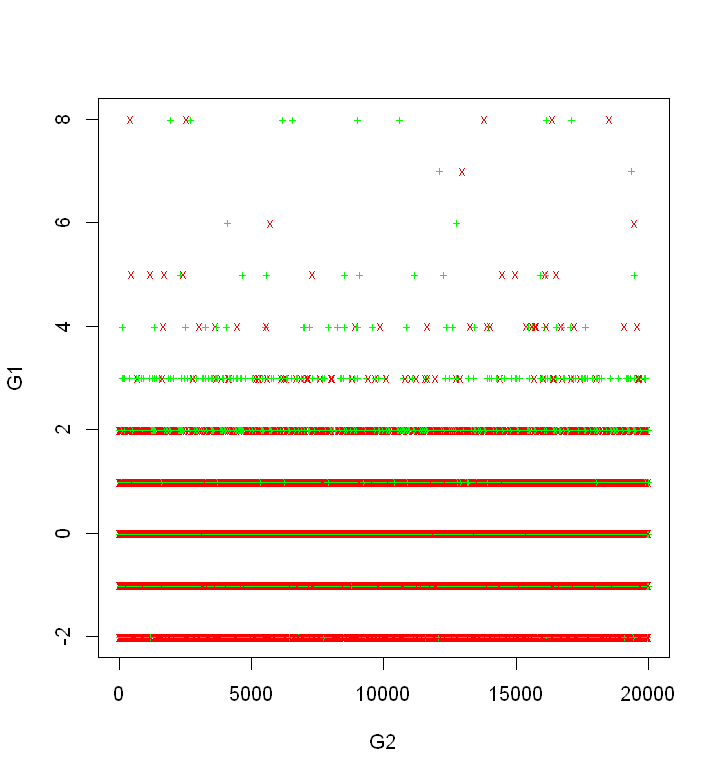

In [167]:
# PAY_0 and PAY_1 for credit

# Plot the partition of tree
options(repr.plot.width=6, repr.plot.height=6.5)
plot(credit$PAY_0, credit$PAY_1,
     pch=c('x', '+')[as.numeric(credit$default.payment.next.month)],
     col=c('red', 'green')[as.numeric(credit$default.payment.next.month)],
     cex=0.7,
     xlab='G2', ylab='G1'
    )

In [45]:
# Fitting the decision tree model
DecisionTreeModel <- tree(default.payment.next.month ~ ., train)
summary(DecisionTreeModel)


Classification tree:
tree(formula = default.payment.next.month ~ ., data = train)
Variables actually used in tree construction:
[1] "PAY_0"
Number of terminal nodes:  3 
Residual mean deviance:  0.9108 = 14570 / 16000 
Misclassification error rate: 0.1815 = 2904 / 16000 

In [46]:
# Decision Tree Model detailed
DecisionTreeModel

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 16000 16890 0 ( 0.7794 0.2206 )  
  2) PAY_0 < 1.5 14378 12990 0 ( 0.8327 0.1673 )  
    4) PAY_0 < 0.5 12441 10080 0 ( 0.8599 0.1401 ) *
    5) PAY_0 > 0.5 1937  2489 0 ( 0.6577 0.3423 ) *
  3) PAY_0 > 1.5 1622  2001 1 ( 0.3070 0.6930 ) *

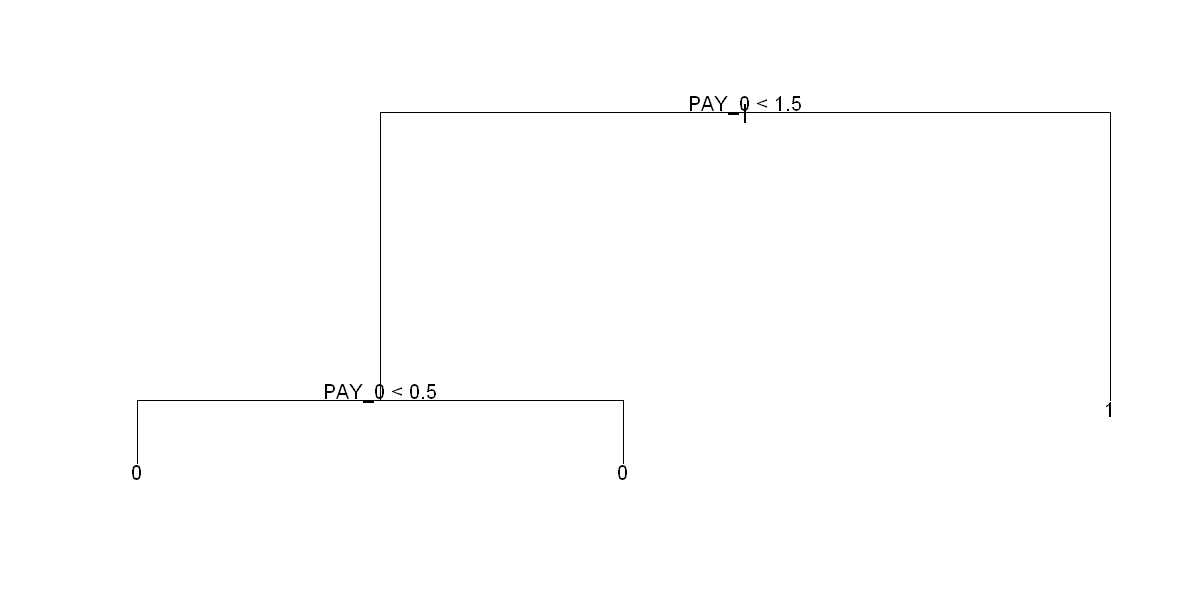

In [47]:
# Plotting the decision tree 

options(repr.plot.width=10, repr.plot.height=5)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
plot(DecisionTreeModel)  # Plot the tree
text(DecisionTreeModel, pretty=1) 

In [48]:
# Making the prediction

set.seed(1)

pred <- predict(DecisionTreeModel, newdata=test, type='class')
pred_proba <- predict(DecisionTreeModel, newdata=test, type='vector')[, 1]

# Evaluation: confusion matrix
table(pred, test$default.payment.next.month)

# Accuracy
print(paste0('Accuracy = ', mean(pred == test$default.payment.next.month)))

# AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test$default.payment.next.month, pred_proba))))

    
pred    0    1
   0 2970  608
   1  146  276

[1] "Accuracy = 0.8115"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.319688485644085"


In [136]:
# Using K-fold cross validation

folds = createFolds(y = train$default.payment.next.month, k = 10)

DT_crossvalidation = lapply(folds, function(var){
  train_fold = train[-var, ]
  test_fold = train[var, ]
  
  DT_classify = tree(default.payment.next.month ~ ., train)
    
  DT_prediction_folds = predict(DT_classify, newdata = test_fold, type = "class")
  
  DT_folds = confusionMatrix(DT_prediction_folds, test_fold$default.payment.next.month)
  accuracy = DT_folds$overall[1]
  
  return(accuracy)
})

In [138]:
# Checking the accuracy after k-fold cross validation

mean(as.numeric(DT_crossvalidation))

[1] 0.8185

### 5. QDA

In [50]:
# Fitting the model

QDA <- qda(default.payment.next.month ~ ., data=train)
QDA

Call:
qda(default.payment.next.month ~ ., data = train)

Prior probabilities of groups:
       0        1 
0.779375 0.220625 

Group means:
  LIMIT_BAL      SEX2 EDUCATION2 EDUCATION3  EDUCATION4 MARRIAGE2  MARRIAGE3
0  175657.3 0.6169206  0.4661588  0.1563753 0.017802727 0.5492382 0.01251002
1  131855.5 0.5730878  0.4994334  0.1824363 0.003966006 0.5150142 0.01331445
      AGE      PAY_0      PAY_2      PAY_3      PAY_4      PAY_5       PAY_6
0 35.4320 -0.2091419 -0.2913392 -0.3104250 -0.3498797 -0.3841219 -0.40208500
1 35.6813  0.6345609  0.4101983  0.3161473  0.2053824  0.1314448  0.07790368
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
0  51555.11  48980.23  47147.85  43147.32  40078.56  38670.39 6000.381  6511.86
1  47398.75  46263.27  44092.40  40957.10  38707.26  37529.21 3451.106  3335.43
  PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
0 5681.403 5276.179 5306.328 5783.722
1 3485.983 3010.149 3049.896 3318.331

In [51]:
 # Predictions

QDA_prediction <- predict(QDA, newdata=test)
head(QDA_prediction$class)
head(QDA_prediction$posterior)

[1] 1 0 0 1 1 1
Levels: 0 1

,0,1
4,0.1701951260,8.298049e-01
18,1.0000000000,1.050647e-112
21,0.9996773206,3.226794e-04
33,0.0015935946,9.984064e-01
43,0.0006507125,9.993493e-01
46,0.1300918430,8.699082e-01


In [52]:
# Evaluation

# confusion matrix
print('Confusion matrix:')
table(QDA_prediction$class, test$default.payment.next.month)

# accuracy 
acc <- mean(QDA_prediction$class == test$default.payment.next.month)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


   
       0    1
  0  782   95
  1 2334  789

[1] "Accuracy = 0.39 %"


In [53]:
# Getting AUC from probability 

pred_proba <- QDA_prediction$posterior[,2]

# AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test$default.payment.next.month, pred_proba))))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.715890361526264"


In [141]:
# Using K-fold cross validation

folds = createFolds(y = train$default.payment.next.month, k = 10)

QDA_crossvalidation = lapply(folds, function(var){
  train_fold = train[-var, ]
  test_fold = train[var, ]
  
  QDA_classify = qda(default.payment.next.month ~ ., data=train)
    
  QDA_prediction_folds = predict(QDA_classify, newdata = test_fold, type = "class")
  
  QDA_folds = confusionMatrix(QDA_prediction_folds$class, test_fold$default.payment.next.month)
  accuracy = QDA_folds$overall[1]
  
  return(accuracy)
})

In [142]:
# Checking the accuracy after k-fold cross validation

mean(as.numeric(QDA_crossvalidation))

[1] 0.3904375

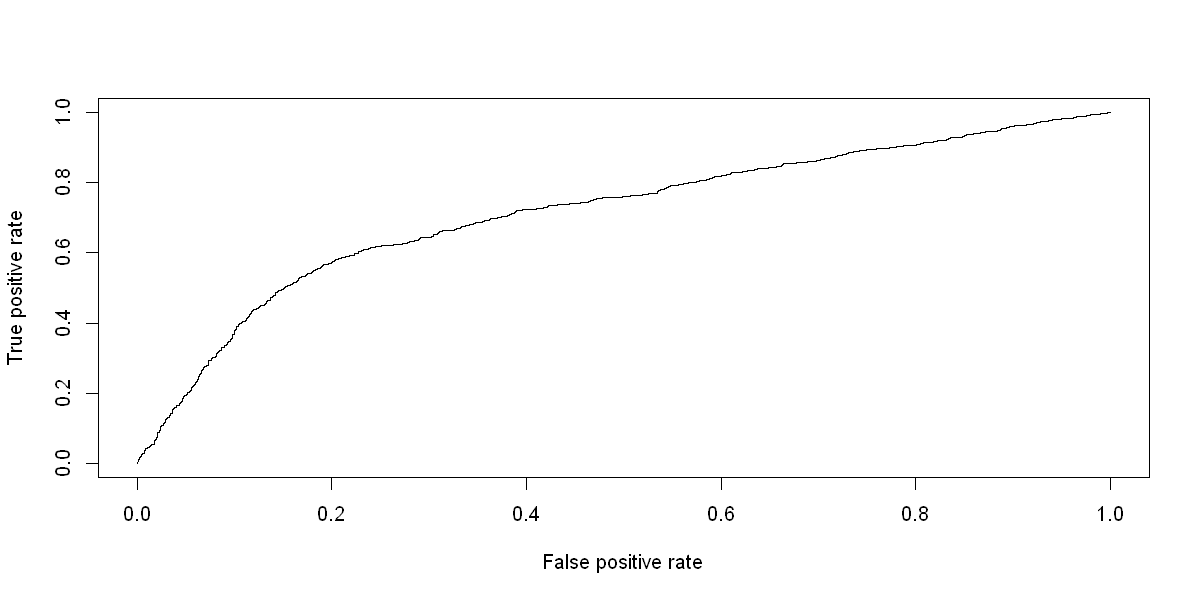

In [165]:
# ROC curves for QDA only

prediction(QDA_prediction$posterior[,2], test$default) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot()

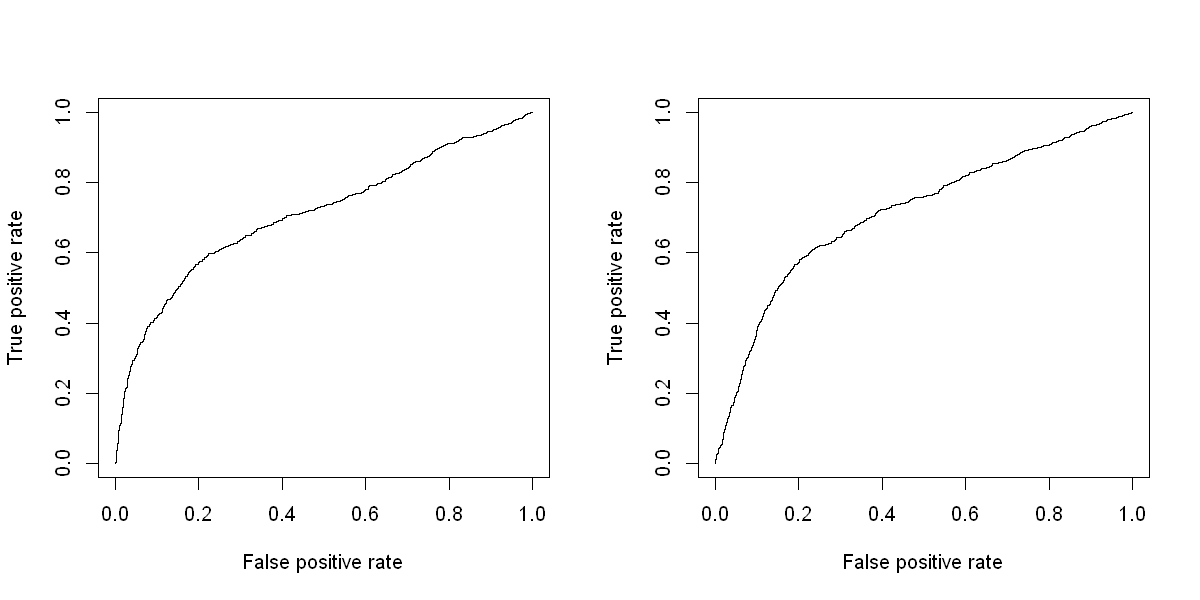

In [164]:
# Differences between LDA and QDA

# ROC curves

par(mfrow=c(1, 2))

prediction(LDA_prediction$posterior[,2], test$default) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot()

prediction(QDA_prediction$posterior[,2], test$default) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot()

### Sources

- Minh Phan’s courses

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. Springer.


For the calc

- https://www.codingprof.com/how-to-replace-nas-with-the-mode-most-frequent-value-in-r/#:~:text=a%20character%20column.-,To%20replace%20NA%C2%B4s%20with%20the%20mode%20in%20a,function%20that%20returns%20the%20mode.

Random forest 

- https://www.kaggle.com/sourabh24293/randomforest-for-default-of-credit-card-clients#6.-Modelling

Logistic Regression 

- https://www.r-bloggers.com/2019/11/logistic-regression-in-r-a-classification-technique-to-predict-credit-card-default/

Other:

- https://rpubs.com/reksi/cc_default

- https://www.kaggle.com/suzanaiacob/predicting-credit-card-balance-using-regression

- https://afit-r.github.io/discriminant_analysis